**Mini Project IIT- Analyzing Covid Data**

Import python libraries.

In [ ]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Load the Json File.

In [ ]:
with open('/content/covid_states_daily (1).json') as f:
  covid_data = json.load(f)

Extract relevant data from json file.

In [ ]:
states_daily = covid_data['states_daily']

Convert the data into datafram using pandas

In [ ]:
df = pd.DataFrame(states_daily)
df.head()

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0


In [ ]:
df['dateymd'].dtype

dtype('O')

Convert the dateymd (object/String) into date format.

In [ ]:
df['dateymd'] = pd.to_datetime(df['dateymd'])

In [ ]:
df['dateymd'].dtype

dtype('<M8[ns]')

**Question and Answer of our Mini Project**

**Question 1**


1. **Detailed Trend Analysis of Confirmed Cases** -
Question: How has the number of confirmed COVID-19 cases evolved over the 515 days for different states? Can you identify any patterns or significant trends, such as periods of rapid increase or decrease?


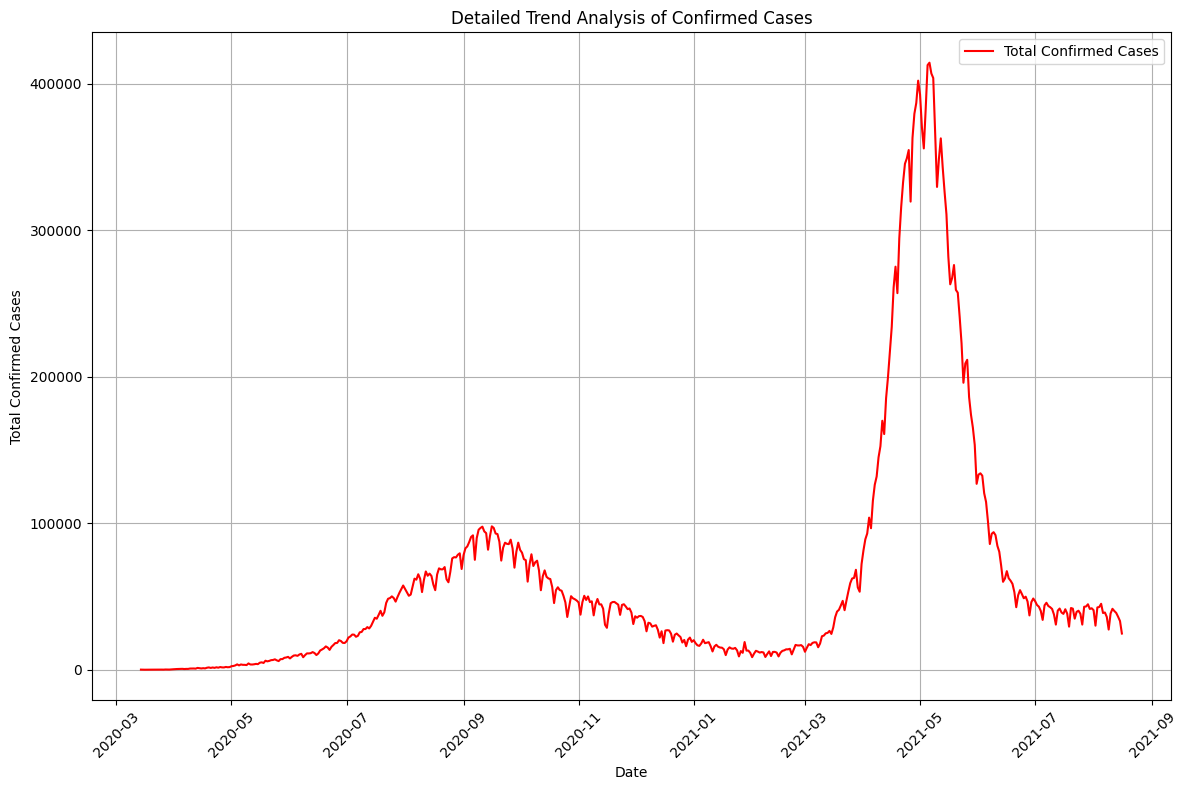

,dateymd,tt
count,521,521.000000
mean,2020-11-29 00:00:00,61898.357006
min,2020-03-14 00:00:00,11.000000
25%,2020-07-22 00:00:00,13919.000000
50%,2020-11-29 00:00:00,38705.000000
75%,2021-04-08 00:00:00,65610.000000
max,2021-08-16 00:00:00,414280.000000
std,NaN,84488.243948


In [ ]:
#Confirm Cases
confirmed_cases = df[df['status']=='Confirmed']

#Total Confirmed cases (tt and Date)
confirmed_cases_total = confirmed_cases[['dateymd', 'tt']]
confirmed_cases_total

#Convert tt datatype to numerical
confirmed_cases_total['tt'] = pd.to_numeric(confirmed_cases_total['tt'])

#Ploting Line chart for Detailed Trend Analysis of Confirmed Cases
plt.figure(figsize=(12, 8))
sns.lineplot(data=confirmed_cases_total, x='dateymd', y='tt', color= 'red', label = 'Total Confirmed Cases')
plt.title('Detailed Trend Analysis of Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Summary of Total Confirmed cases (Statistic Summary)
confirmed_cases_total.describe()

**Insight-**
The graph shows two major waves of COVID-19 cases:

First Wave (March 2020 - November 2020): A gradual rise in cases began in March 2020, peaking around September 2020. The decline from October to November suggests the effectiveness of lockdowns and preventive measures.

Second Wave (March 2021 - July 2021): A much sharper increase occurred, peaking in May 2021, likely due to new variants and reduced restrictions. A steep decline followed, driven by strict lockdowns and increased vaccinations.

Key Patterns:

Two distinct peaks, with the second being more severe.
Rapid rises followed by sharp declines, indicating responsive interventions.
Vaccination rollouts and stricter measures significantly influenced trends.

**Question 2**

2. **Predicting Future Active Cases**-
Question: Based on the past 515 days of data, can you predict the number of active COVID-19 cases for the next 10 days in a given state? What factors might affect the accuracy of your prediction?

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


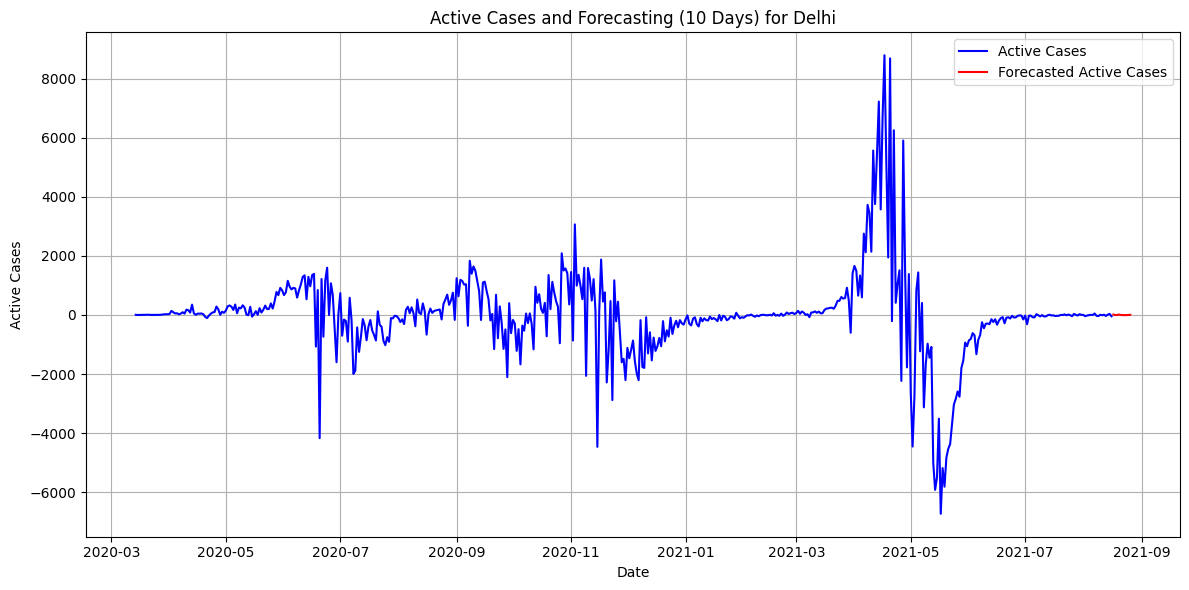

2021-08-17    12.496011
2021-08-18    -2.217571
2021-08-19    -1.770796
2021-08-20    13.169857
2021-08-21    -2.407507
2021-08-22    -3.325108
2021-08-23    -5.691918
2021-08-24    -6.431900
2021-08-25     0.708271
2021-08-26     3.701597
Freq: D, Name: predicted_mean, dtype: float64


In [ ]:
#Import Arima Model for Forecasting
from statsmodels.tsa.arima.model import ARIMA

#Filter data for Delhi state. You can take any state.
state_code = "dl"
confirmed_cases = df[(df['status']=='Confirmed')][['dateymd', state_code]].copy()
recovered_cases = df[(df['status']=='Recovered')][['dateymd', state_code]].copy()
deceased_cases = df[(df['status']=='Deceased')][['dateymd', state_code]].copy()

#Rename columns
confirmed_cases.columns = ['date', 'confirmed']
recovered_cases.columns = ['date', 'recovered']
deceased_cases.columns = ['date', 'deceased']

#Merge the data on date using left join
merged_data = pd.merge(confirmed_cases, recovered_cases, on='date', how='left')
merged_data = pd.merge(merged_data, deceased_cases, on='date', how='left')

#Convert confirmed, recovered and deceased to numeric and use error = 'coerce'.
merged_data['confirmed'] = pd.to_numeric(merged_data['confirmed'], errors = 'coerce')
merged_data['recovered'] = pd.to_numeric(merged_data['recovered'], errors = 'coerce')
merged_data['deceased'] = pd.to_numeric(merged_data['deceased'], errors = 'coerce')

#fill missing values with 0 (we can take mean, median or mode according to the requirements)
merged_data.fillna(0, inplace=True)

#Create a new column 'active' for calculating active cases
merged_data['active'] = merged_data['confirmed'] - merged_data['recovered'] - merged_data['deceased']

#Set date as index
merged_data.set_index('date', inplace=True)

#Use ARIMA model for forecasting
active_cases = merged_data['active']

#Fit the model and adjust (p,d,q)
model = ARIMA(active_cases, order=(5, 1, 2))
model_fit = model.fit()

#Forecasting using ARIMA model for 10 Days
forecasting = model_fit.forecast(steps=10)

#Plot the graph for Active Cases and Forecasting (10 Days)
plt.figure(figsize=(12, 6))
plt.plot(active_cases, label='Active Cases', color='blue')
plt.plot(forecasting, label='Forecasted Active Cases', color='red')
plt.title('Active Cases and Forecasting (10 Days) for Delhi')
plt.xlabel('Date')
plt.ylabel('Active Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Print the forecasted values
print(forecasting)

**Insight**-Here are insights based on the graph:

**Active Cases Calculation**: The blue line shows past 515 days of active COVID-19 cases, calculated using the formula (Confirmed - Recovered - Deceased).

**Stable Period (Early 2020)**: From March 2020 to mid-2020, active cases remain relatively stable with minor fluctuations.

**Volatile Period (Mid-2020)**: Erratic fluctuations appear mid-2020, possibly due to testing or reporting changes.

**Major Spike (Early 2021)**: A large surge is visible around early 2021, likely corresponding to the second COVID wave.

**Sharp Decline and Stabilization (Mid-2021)**: After the peak, a sharp decline is followed by a period of stability around mid-2021.

**10-Day Forecast (Red Line)**: The forecast predicts minimal change in active cases, suggesting stability for the next 10 days.

**Prediction Limitations**: Factors like new variants or lockdowns can affect the accuracy of this linear regression model’s prediction.








**Question 3**

3. **Examining the Relationship Between Confirmed and Recovered Cases**-
Question: Is there a strong relationship between confirmed and recovered cases for a given state? Can you fit a linear equation to model this relationship? How strong is the correlation between the two?

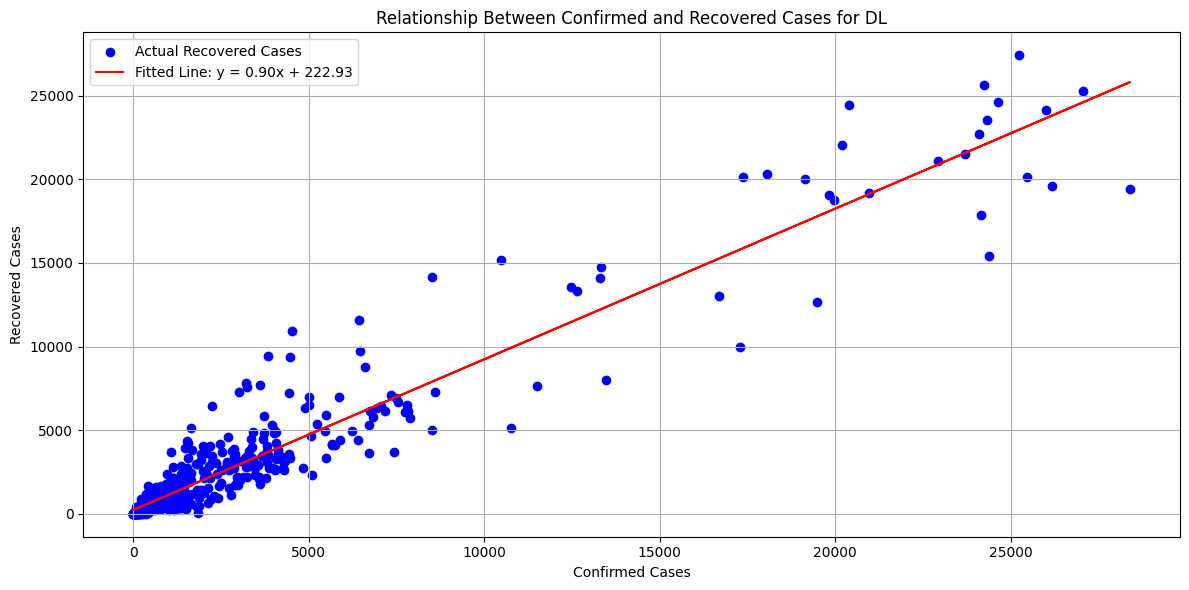

Linear Equation: y = 0.90x + 222.93
R^2 (Correlation Coefficient): 0.9140


In [ ]:
#import libraries for Linear Regression Model and Evaluation Metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Filter data for Delhi state. You can take any state.
state_code = "dl"
confirmed_cases = df[(df['status']=='Confirmed')][['dateymd', state_code]].copy()
recovered_cases = df[(df['status']=='Recovered')][['dateymd', state_code]].copy()

#Rename columns
confirmed_cases.columns = ['date', 'confirmed']
recovered_cases.columns = ['date', 'recovered']

#Merge the data on date using left join
merged_data = pd.merge(confirmed_cases, recovered_cases, on='date', how='left')

#Convert confirmed, recovered and deceased to numeric and use error = 'coerce'.
merged_data['confirmed'] = pd.to_numeric(merged_data['confirmed'], errors = 'coerce')
merged_data['recovered'] = pd.to_numeric(merged_data['recovered'], errors = 'coerce')

#Drop null values
merged_data.dropna(inplace=True)

#X and y for preparation of data
X = merged_data['confirmed'].values.reshape(-1, 1)
y = merged_data['recovered'].values

#Create and fit Linear Regression Model on X and y.
model = LinearRegression()
model.fit(X,y)

#Prediction using Linear Regression Model.
y_pred = model.predict(X)

#find out slope and intercept for equation of line
slope = model.coef_[0]
intercept = model.intercept_

#Evalaution Metrics- Compute the correlation coeff. R^2
r2 = r2_score(y, y_pred)

# Plot the scatter plot and the regression line
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Actual Recovered Cases')
plt.plot(X, y_pred, color='red', label=f'Fitted Line: y = {slope:.2f}x + {intercept:.2f}')
plt.title(f'Relationship Between Confirmed and Recovered Cases for {state_code.upper()}')
plt.xlabel('Confirmed Cases')
plt.ylabel('Recovered Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()
# Print the linear equation and R^2 value
print(f"Linear Equation: y = {slope:.2f}x + {intercept:.2f}")
print(f"R^2 (Correlation Coefficient): {r2:.4f}")

**Insight**
*   **Positive Correlation**: The slope of 0.90 suggests that for every 100 confirmed cases, approximately 90 cases are expected to recover, showing a strong recovery rate in Delhi.
*  **Scatter Distribution**: Most data points cluster around the fitted line, implying consistency between confirmed and recovered cases. However, some outliers, particularly in higher confirmed cases, show a wider spread, indicating variability in recovery for larger outbreaks.
* **Intercept**: The intercept of 222.93 suggests that even with very few confirmed cases, a minimum baseline of recovered cases is observed, which could reflect early recoveries or reporting patterns.
  







**Question-4**

4. **Comparing Recovery Rates Across States** -
Question: Which states have the highest and lowest recovery rates over the past 515 days? Can you identify any trends or common factors among states with high or low recovery rates?

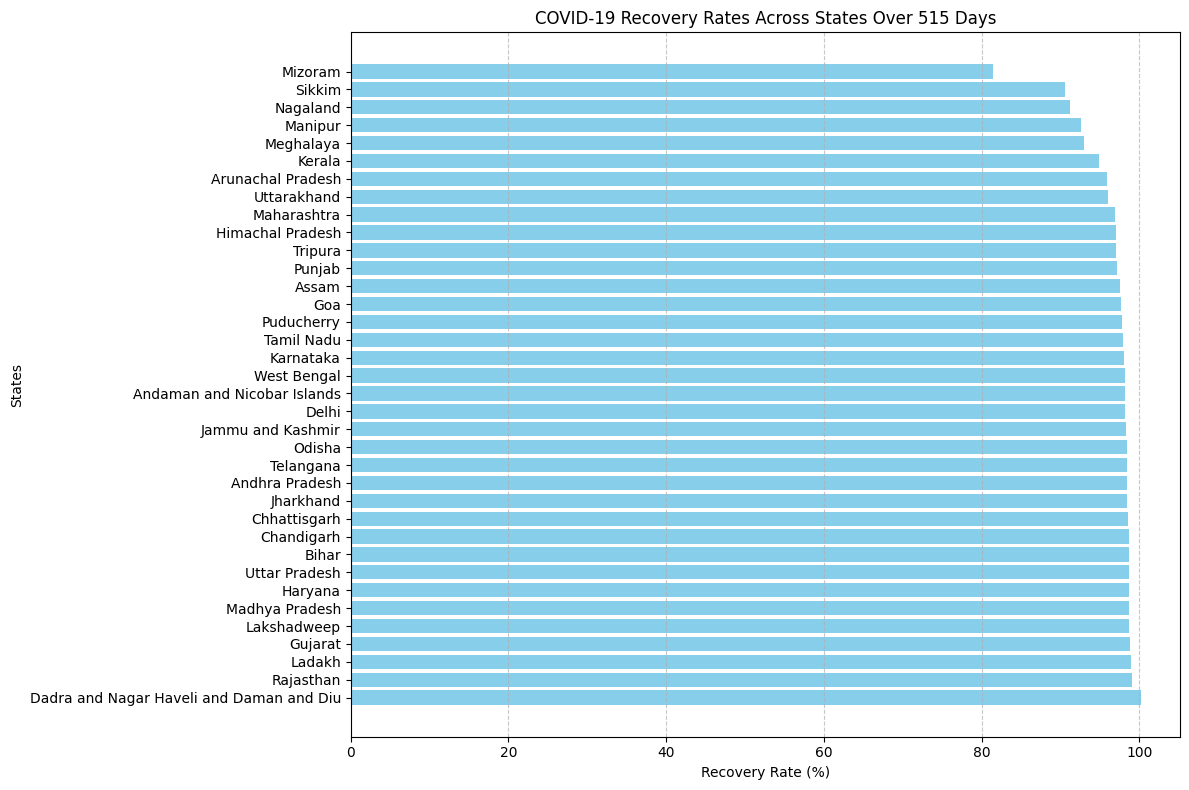

Top 5 States by Recovery Rate:
                                       State  Recovery Rate
8   Dadra and Nagar Haveli and Daman and Diu     100.133080
28                                 Rajasthan      99.042511
17                                    Ladakh      98.924258
10                                   Gujarat      98.756658
18                               Lakshadweep      98.737128

Bottom 5 States by Recovery Rate:
        State  Recovery Rate
20  Meghalaya      92.945696
21    Manipur      92.648725
24   Nagaland      91.230537
29     Sikkim      90.532359
23    Mizoram      81.392293


In [ ]:
#Filter data for confirmed and recovered.
confirmed_cases = df[(df['status']=='Confirmed')].copy()
recovered_cases = df[(df['status']=='Recovered')].copy()

# State name mapping: map state abbreviations to full names of state
state_mapping = {
    "an": "Andaman and Nicobar Islands", "ap": "Andhra Pradesh", "ar": "Arunachal Pradesh", "as": "Assam",
    "br": "Bihar", "ch": "Chandigarh", "ct": "Chhattisgarh", "dl": "Delhi", "dn": "Dadra and Nagar Haveli and Daman and Diu",
    "ga": "Goa", "gj": "Gujarat", "hp": "Himachal Pradesh", "hr": "Haryana", "jh": "Jharkhand", "jk": "Jammu and Kashmir",
    "ka": "Karnataka", "kl": "Kerala", "la": "Ladakh", "ld": "Lakshadweep", "mh": "Maharashtra", "ml": "Meghalaya",
    "mn": "Manipur", "mp": "Madhya Pradesh", "mz": "Mizoram", "nl": "Nagaland", "or": "Odisha", "pb": "Punjab",
    "py": "Puducherry", "rj": "Rajasthan", "sk": "Sikkim", "tg": "Telangana", "tn": "Tamil Nadu", "tr": "Tripura",
    "up": "Uttar Pradesh", "ut": "Uttarakhand", "wb": "West Bengal", "tt": "India Total"
}

# List of state codes excluding 'tt' for total India
state_codes = [code for code in state_mapping if code != 'tt']

# Initialize a dictionary to store recovery rates for each state
recovery_rates = {}

# Calculate recovery rates for each state
for state in state_codes:
  total_confirmed = pd.to_numeric(confirmed_cases[state], errors='coerce').sum()
  total_recovered = pd.to_numeric(recovered_cases[state], errors='coerce').sum()

  if total_confirmed > 0:
    recovery_rate = (total_recovered / total_confirmed) * 100

  else:
    recovery_rate = 0

  # Use full state name in the dictionary
  recovery_rates[state_mapping[state]] = recovery_rate

# Convert the recovery rates dictionary into a DataFrame for easier manipulation
recovery_rates_df = pd.DataFrame(list(recovery_rates.items()), columns = ['State', 'Recovery Rate'])

# Sort states by recovery rate from highest to lowest
recovery_rates_df.sort_values(by = 'Recovery Rate', ascending=False, inplace = True)

# Plotting the recovery rates as a bar chart
plt.figure(figsize=(12, 8))
plt.barh(recovery_rates_df['State'], recovery_rates_df['Recovery Rate'], color='skyblue')
plt.xlabel('Recovery Rate (%)')
plt.ylabel('States')
plt.title('COVID-19 Recovery Rates Across States Over 515 Days')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# top 5 and bottom 5 states by recovery rate
top_5_states = recovery_rates_df.head()
bottom_5_states = recovery_rates_df.tail()
print("Top 5 States by Recovery Rate:")
print(top_5_states)
print("\nBottom 5 States by Recovery Rate:")
print(bottom_5_states)


**Insight**


*   Top-Performing States: Rajasthan, Dadra and Nagar Haveli, and Daman and Diu  show the highest recovery rates, nearly approaching 100%. These states have effectively managed the pandemic in terms of patient recovery.
*   Moderate Recovery Rates: States like Delhi, Jammu and Kashmir, and Odisha have lower recovery rates compared to the top performers but still exhibit strong outcomes, possibly due to better healthcare facilities or timely interventions.
*   Lower Recovery Rates: States such as Mizoram, Sikkim, Nagaland, Manipur, and Meghalaya show the lowest recovery rates, suggesting challenges in healthcare delivery or larger outbreaks that hindered recovery.
*   Consistency: Most states exhibit a recovery rate above 80%, indicating overall effective management of COVID-19 recoveries across the country, though some states lag behind.

The uniformity in high recovery rates suggests that despite challenges, most Indian states were able to handle the pandemic well in terms of patient recovery. However, there are a few outliers that might require further analysis.








